In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-advertising-data/Advertising_Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,6]

In [3]:
df=pd.read_csv('/kaggle/input/product-advertising-data/Advertising_Data.csv')
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [4]:
df.shape

(300, 7)

In [5]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


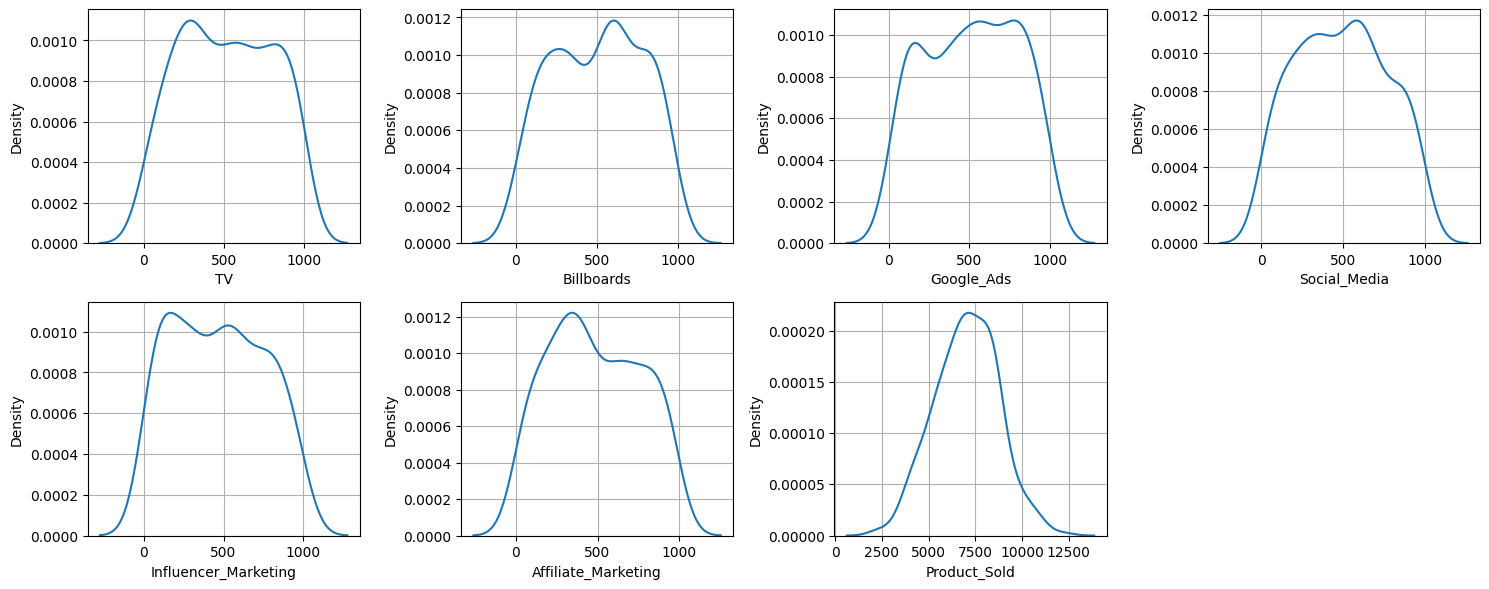

In [7]:
r=2
c=4
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

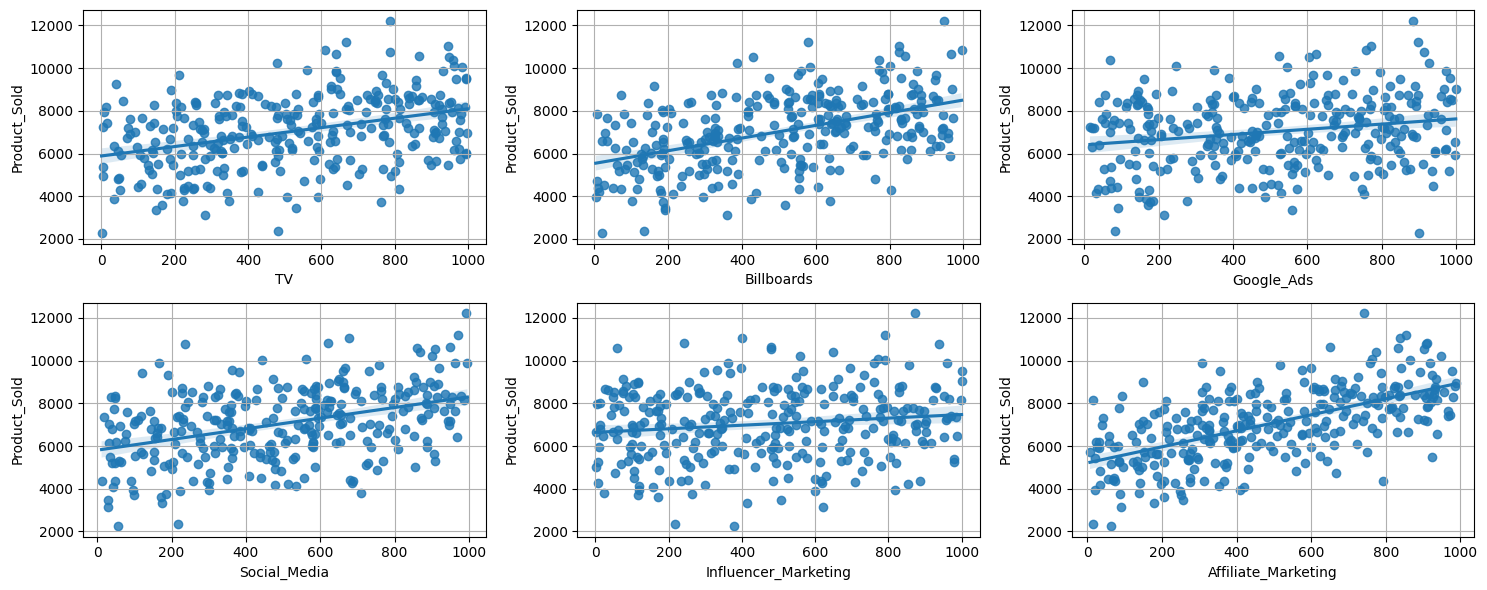

In [8]:
r=2
c=3
it=1
for i in ['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing']:
    plt.subplot(r,c,it)
    sns.regplot(x=i,y='Product_Sold',data=df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

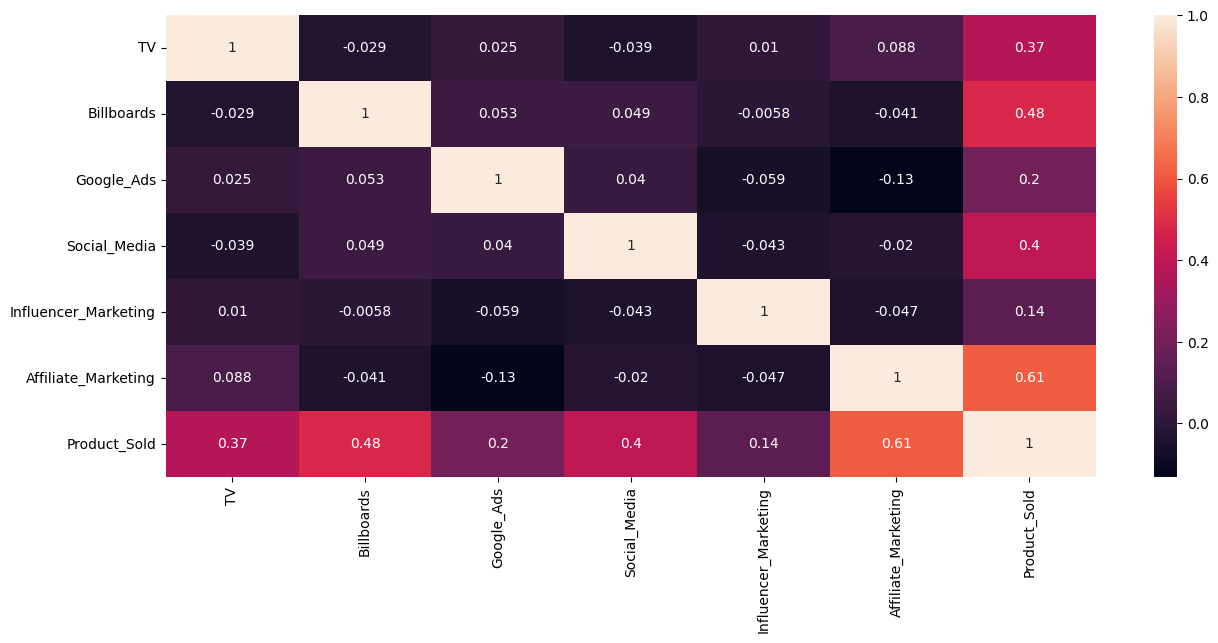

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

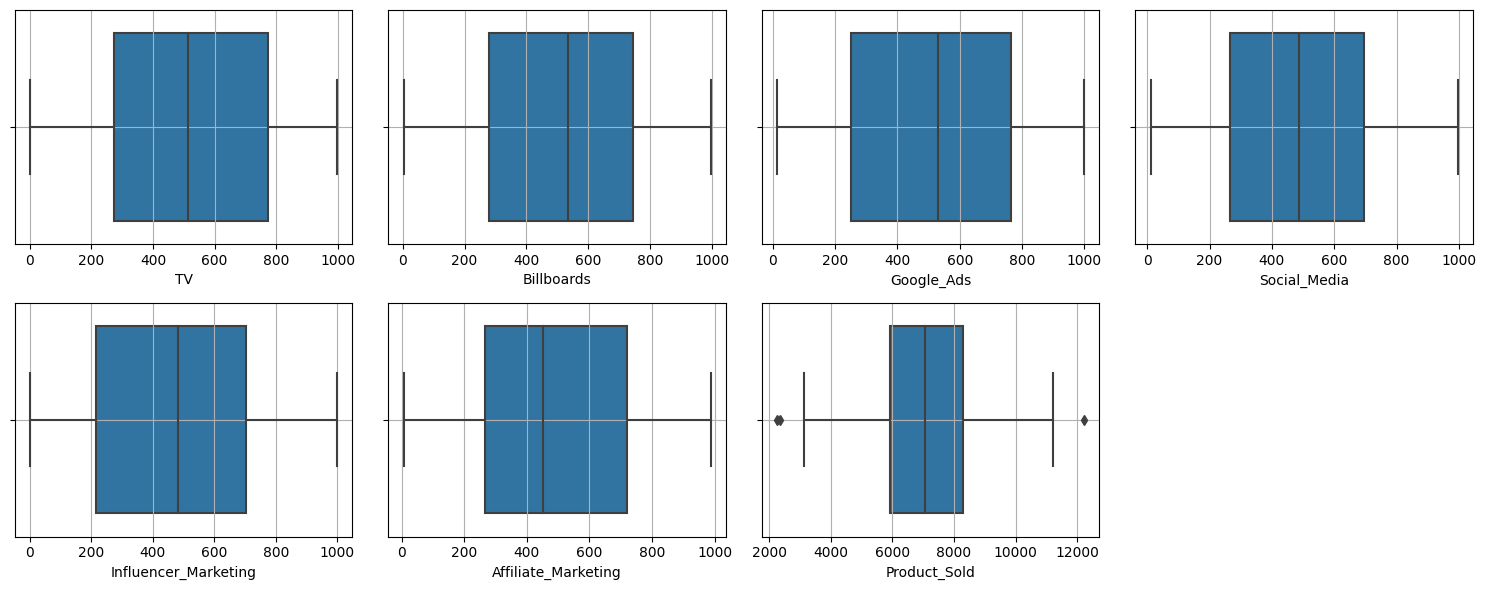

In [10]:
r=2
c=4
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.boxplot(x=df[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

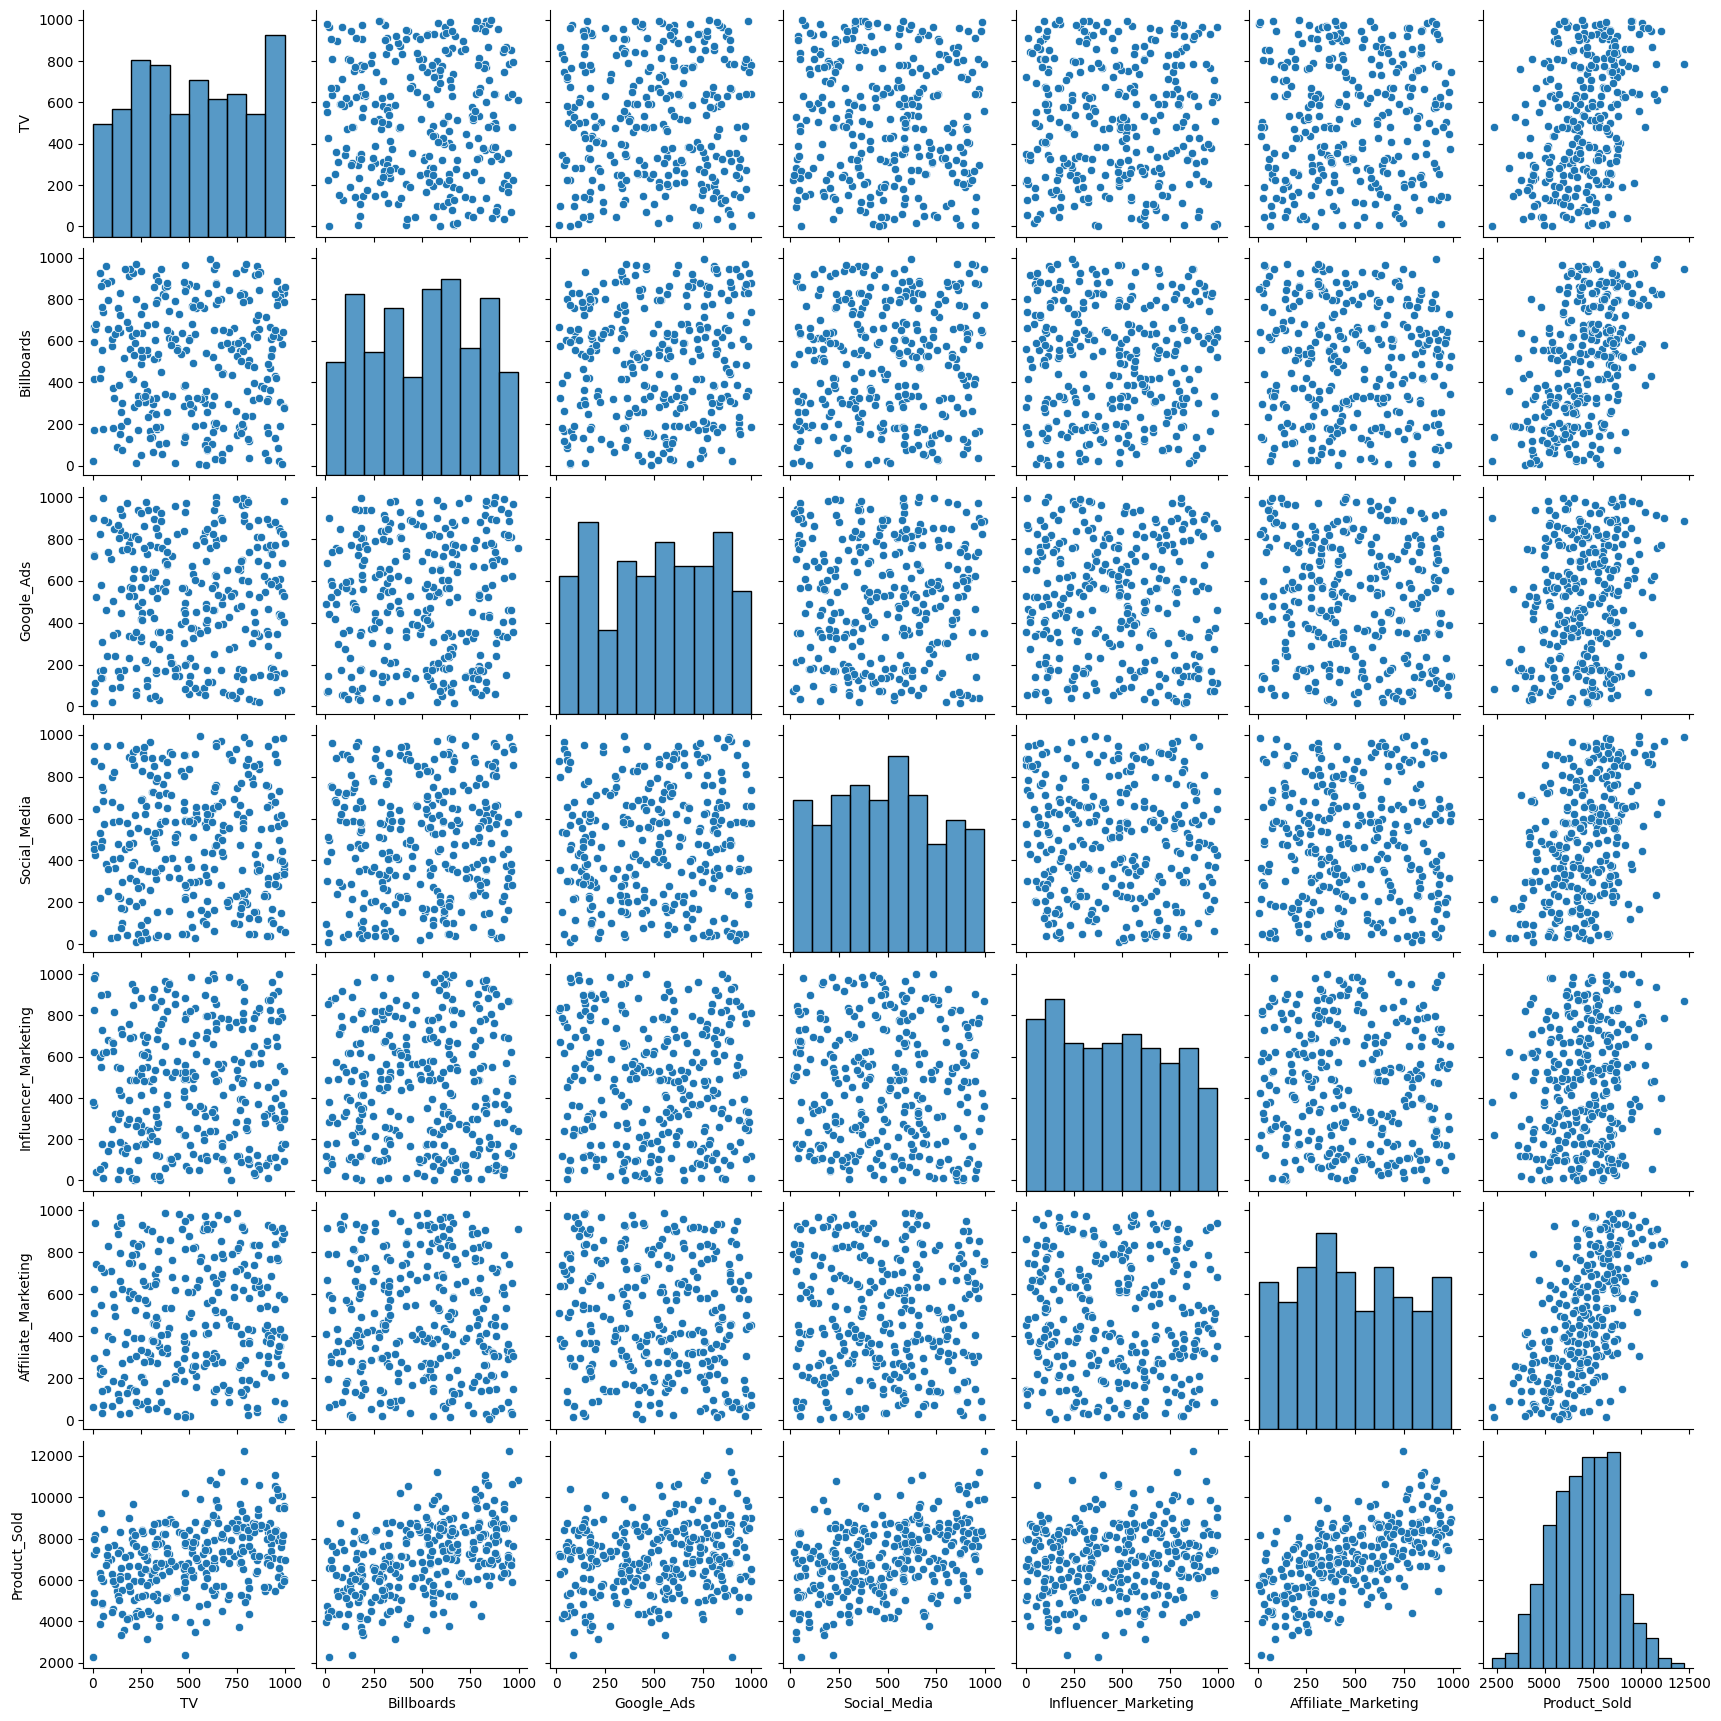

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
import statsmodels.api as sm

In [13]:
y = df['Product_Sold']
x = df.drop('Product_Sold',axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()

In [16]:
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,-0.820525,0.131290,-1.363429,-0.513849,-0.774624,1.533989
1,0.645052,-0.748468,0.160332,-1.131015,1.095522,-1.268508
2,-0.710246,-0.750611,0.458037,0.058187,-0.093188,-0.072797
3,1.324909,-1.602772,0.127343,-0.910188,-0.648892,-0.187972
4,0.865992,0.174576,0.489446,0.645620,-0.241121,1.288324


In [17]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+06
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:00:32   Log-Likelihood:                -1123.6
No. Observations:                 300   AIC:                             2261.
Df Residuals:                     293   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7031.5233 

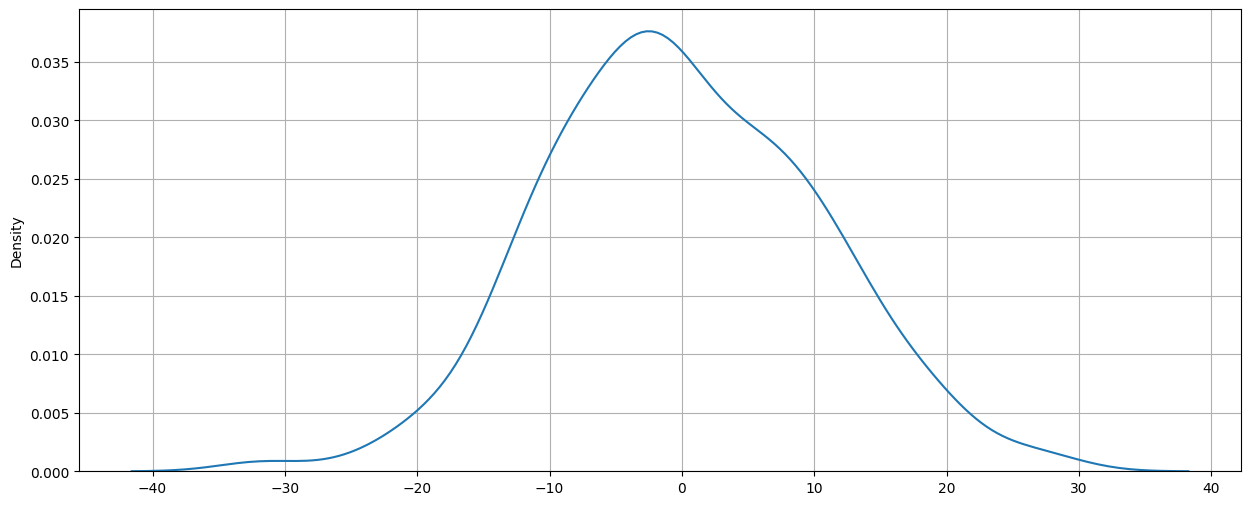

In [18]:
sns.kdeplot(model.resid)
plt.grid()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [21]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()

In [22]:
from sklearn.metrics import r2_score, mean_squared_error


In [23]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(xtrain,ytrain)
    y_pred_train = model_name.predict(xtrain)
    y_pred_test = model_name.predict(xtest)
    print("The TRAIN r2 score is",r2_score(ytrain,y_pred_train))
    print("The RMSE score for TRAIN data is",np.sqrt(mean_squared_error(ytrain,y_pred_train)))
    sns.kdeplot(ytrain)
    sns.kdeplot(y_pred_train)
    plt.grid()
    plt.show()
    print("--"*50)
    print("The TEST r2 score is",r2_score(ytest,y_pred_test))
    print("The RMSE score for TEST data is",np.sqrt(mean_squared_error(ytest,y_pred_test)))
    sns.kdeplot(ytest)
    sns.kdeplot(y_pred_test)
    plt.grid()
    plt.show()

For the LinearRegression()
The TRAIN r2 score is 0.9999622286205176
The RMSE score for TRAIN data is 10.368628607674124


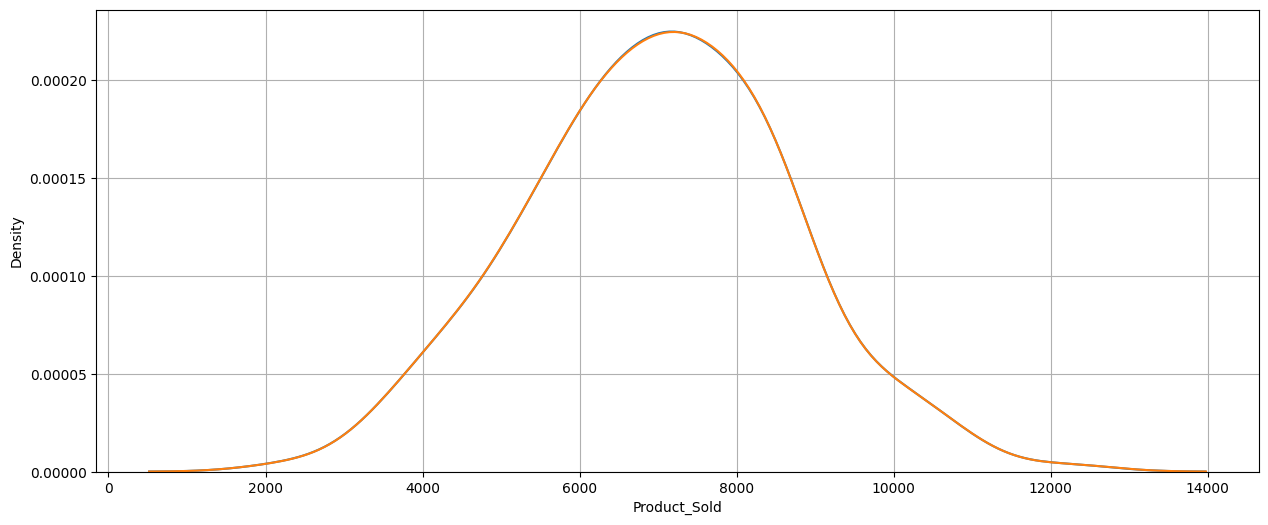

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.9999659903345287
The RMSE score for TEST data is 10.087791705112917


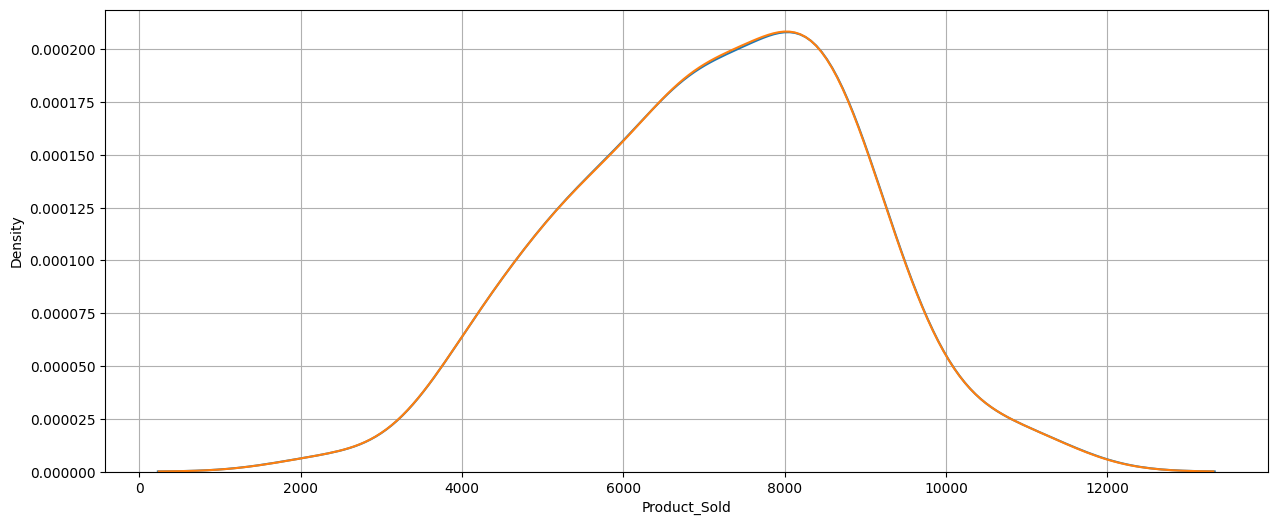

In [24]:
predictor(lr)

For the DecisionTreeRegressor()
The TRAIN r2 score is 1.0
The RMSE score for TRAIN data is 0.0


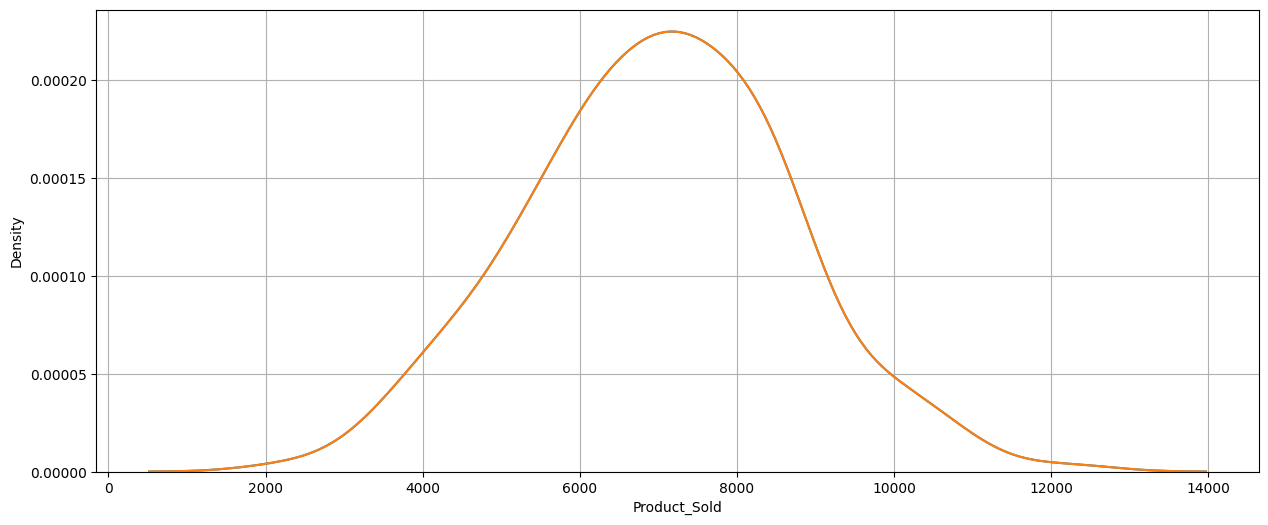

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.5627738166231544
The RMSE score for TEST data is 1143.794508545035


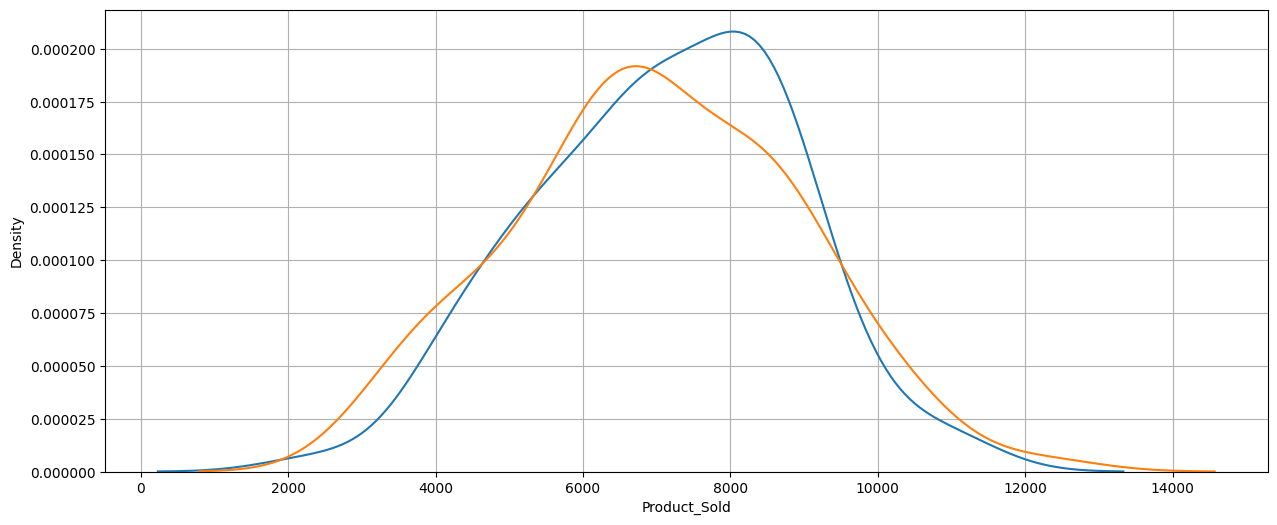

In [25]:
predictor(dt)

For the RandomForestRegressor()
The TRAIN r2 score is 0.9784461081025825
The RMSE score for TRAIN data is 247.68673356537636


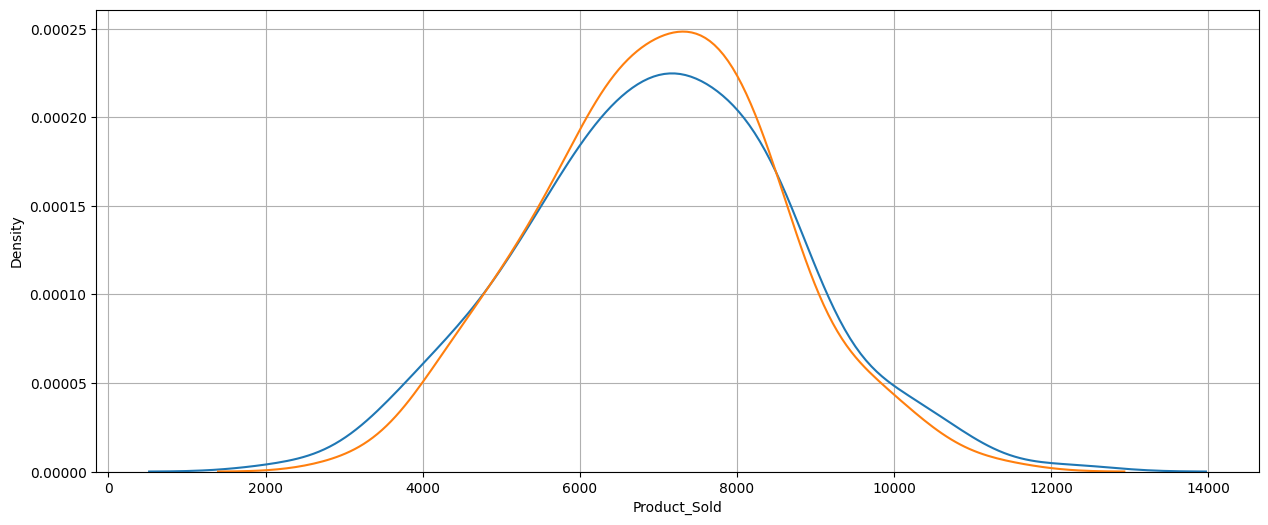

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.8456982343144644
The RMSE score for TEST data is 679.4857825763048


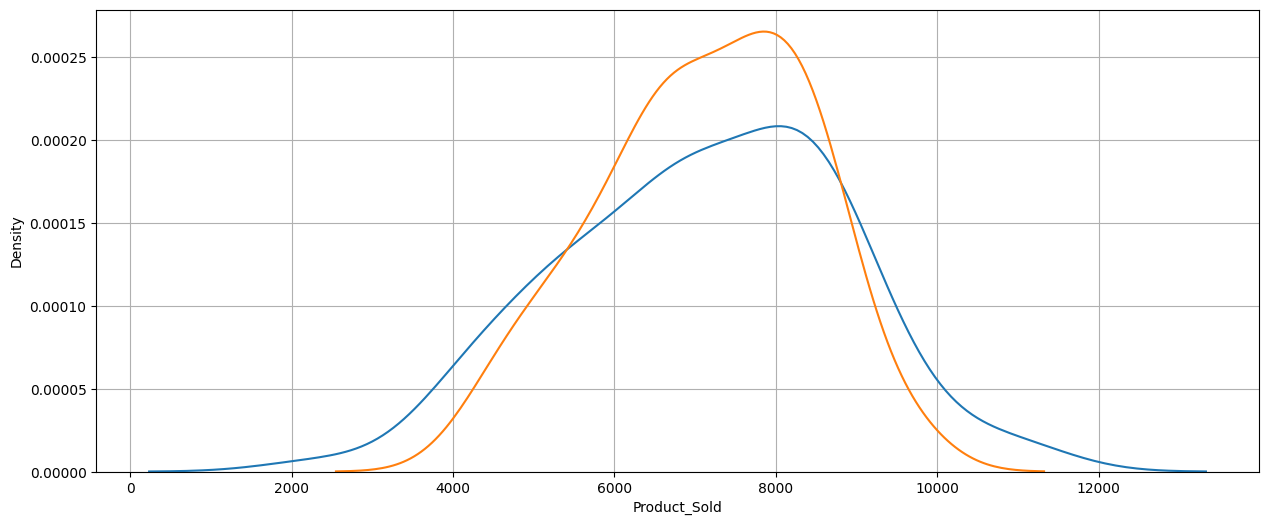

In [26]:
predictor(rf)

For the KNeighborsRegressor()
The TRAIN r2 score is 0.9057696583812377
The RMSE score for TRAIN data is 517.8873207101917


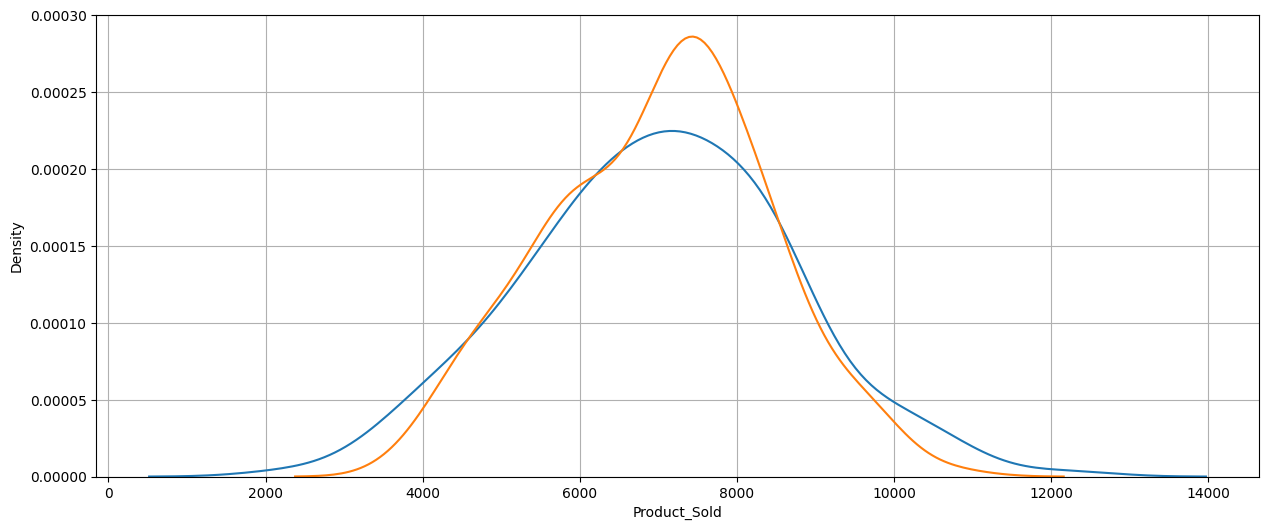

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.8889022089143069
The RMSE score for TEST data is 576.5641542794696


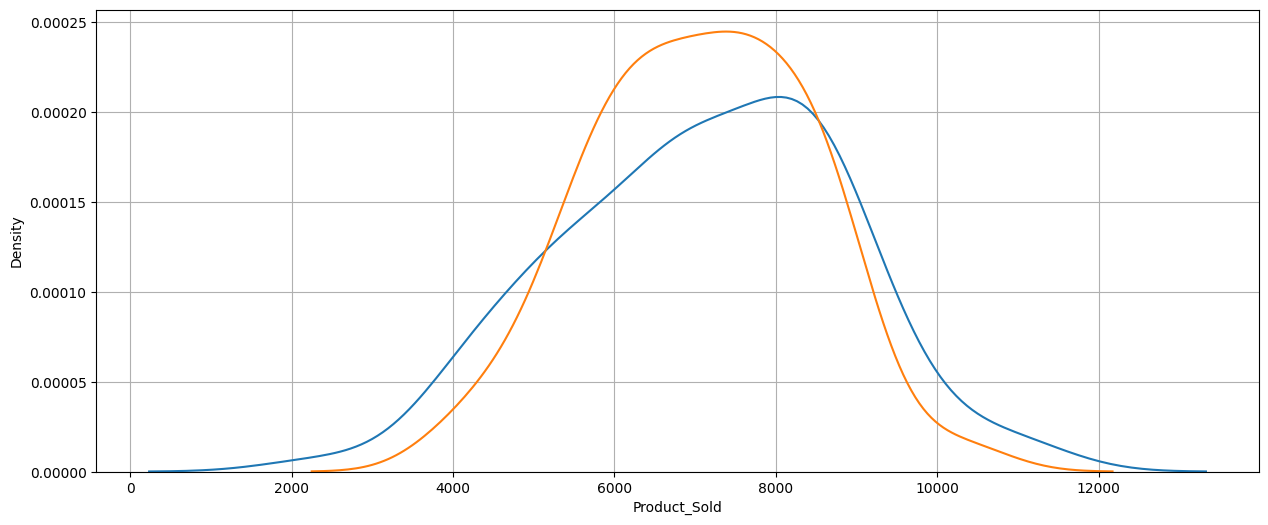

In [27]:
predictor(knn)

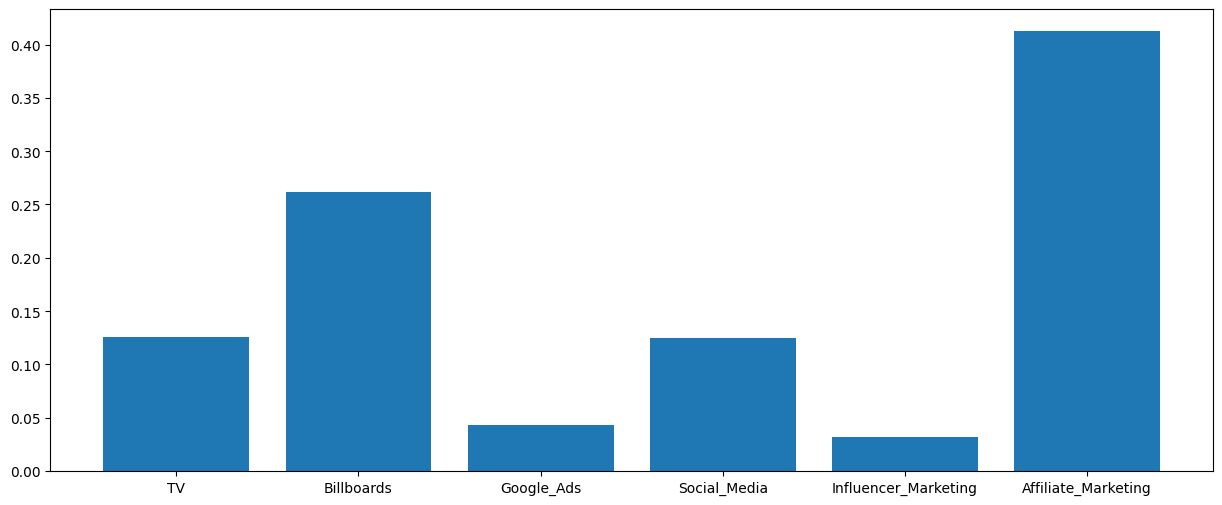

In [28]:
plt.bar(xtrain.columns,rf.fit(xtrain,ytrain).feature_importances_)
#plt.grid()
plt.show()

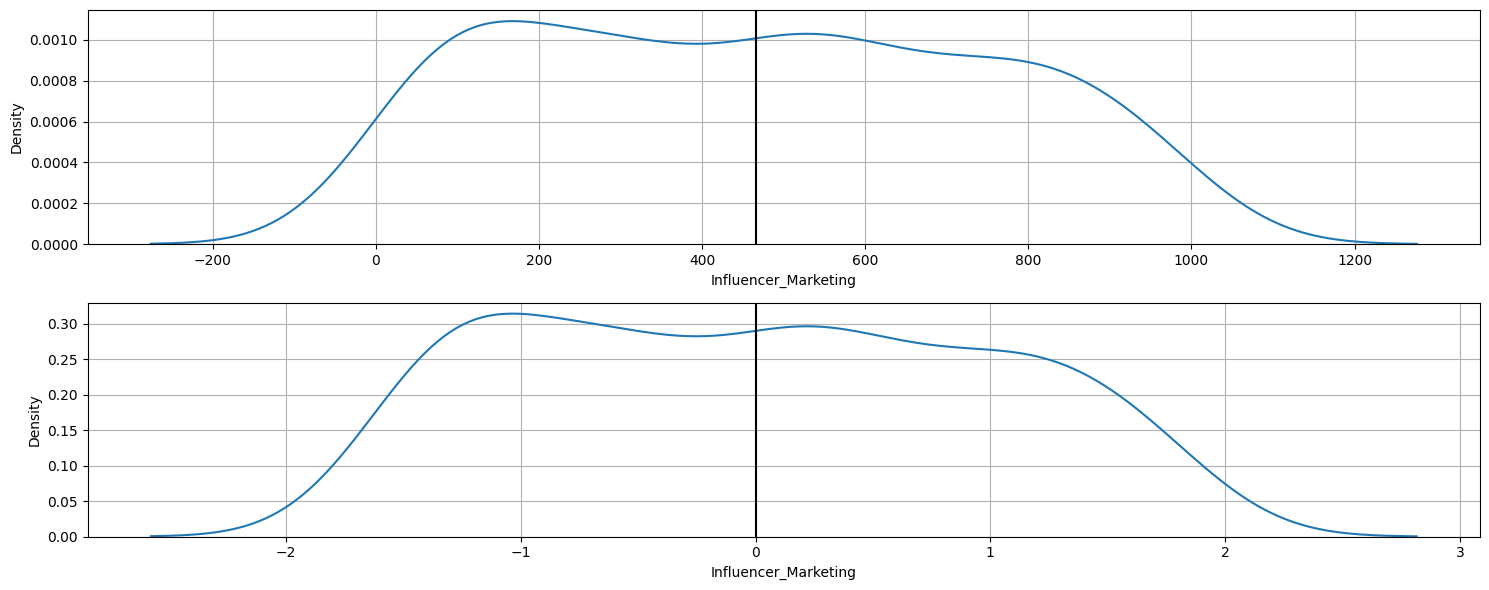

In [29]:
param='Influencer_Marketing'
plt.subplot(2,1,1)
sns.kdeplot(df[param])
plt.axvline(df[param].mean(),color='k')
plt.grid()
plt.subplot(2,1,2)
sns.kdeplot(x[param])
plt.axvline(x[param].mean(),color='k')
plt.grid()

plt.tight_layout()
plt.show()